En este ejercicio utilizaremos el dataset ‘wage1.txt‘
de Wooldridge (2009), que es una base de datos de corte transversal de 526 trabajadores de Estados
Unidos correspondiente a 1976. Este conjunto de datos contiene información sobre distintos atributos de individuos, incluyendo el logaritmo del salario horario (lwage), los años de escolaridad
(educ), los años aproximados de experiencia laboral y su cuadrado (exper y expersq) y una variable
indicadora que toma valor 1 para mujeres y 0 para hombres (female). Se pide

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:

df = pd.read_csv('data/wage1/wage1.txt', sep='\t')
df.columns

Index(['clerocc', 'construc', 'educ', 'exper', 'expersq', 'female', 'lwage',
       'married', 'ndurman', 'nonwhite', 'northcen', 'numdep', 'profocc',
       'profserv', 'services', 'servocc', 'smsa', 'south', 'tenure', 'tenursq',
       'trade', 'trcommpu', 'wage', 'west'],
      dtype='object')

In [4]:
def get_betas(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

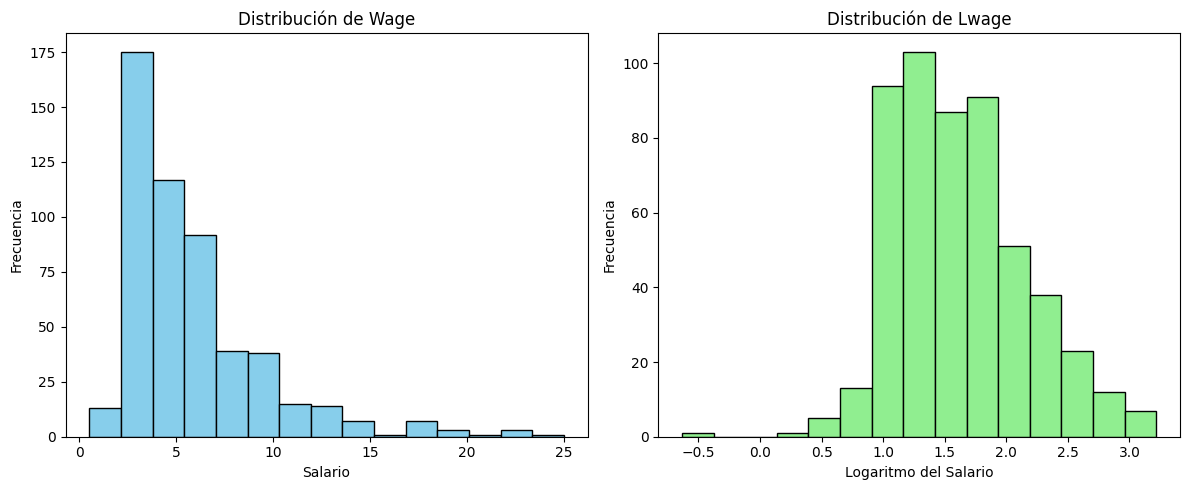

In [5]:
# Crear figura
fig, axs = plt.subplots(1,2,figsize=(12, 5))

# Histograma de wage
axs[0].hist(df['wage'], bins=15, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución de Wage')
axs[0].set_xlabel('Salario')
axs[0].set_ylabel('Frecuencia')

# Histograma de lwage
axs[1].hist(df['lwage'], bins=15, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribución de Lwage')
axs[1].set_xlabel('Logaritmo del Salario')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

(a) Ajustar el modelo lineal general
𝑙𝑤𝑎𝑔𝑒 ∼ 𝛽0 + 𝛽1𝑒𝑑𝑢𝑐 + 𝛽2𝑒𝑥𝑝𝑒𝑟 + 𝛽3𝑒𝑥𝑝𝑒𝑟𝑠𝑞 + 𝛽4 𝑓 𝑒𝑚𝑎𝑙𝑒.

In [6]:
regresores = ['educ', 'exper', 'expersq','female']

X = df[regresores].values
y = df['lwage'].values

X = np.column_stack((np.ones(X.shape[0]), X))
beta_hat = get_betas(X, y)

In [7]:
beta_hat

array([ 0.39048305,  0.08413608,  0.03890997, -0.00068602, -0.33718676])

(b) Interpretar los coeficientes obtenidos

In [8]:
print('Coeficientes estimados:')
coef_names = ['intercepto'] + regresores
for coef_name in coef_names:
  print(coef_name, ':', beta_hat[coef_names.index(coef_name)])

Coeficientes estimados:
intercepto : 0.3904830472699911
educ : 0.0841360759837494
exper : 0.03890996724500798
expersq : -0.0006860225067380863
female : -0.3371867592800123


(c) Estimar el error irreducible del modelo 𝜎^2

In [9]:
y_pred = X @ beta_hat
residuos = y - y_pred

# Obtener SCR (RSS)
RSS = (residuos**2).sum()

# Obtener sigma2_hat
n,p = X.shape
sigma2_hat = RSS / (n - p)

print('Varianza estimada de los residuos:', sigma2_hat)

Varianza estimada de los residuos: 0.17093784508103393


(d) Realizar los test de significatividad individual para cada regresor. 

Seria h_0: beta = 0 (no tiene significancia). Se rechaza H0 si tiene significancia

In [17]:
# Obtener la matriz de varianzas y covarianzas no-escalada
XTX_1 = np.linalg.inv(X.T @ X)

# Calcular la varianza de los estimadores
var_cov = sigma2_hat * XTX_1

# Coeficiente estimado y su desviación estándar para female
#beta_female = beta_hat[-1]  # Último coeficiente (female)
#se_beta_female = np.sqrt(var_cov[-1, -1])

var_cov.shape

(5, 5)

In [28]:
from scipy.stats import t

for i, coef_name in enumerate(coef_names):
    beta_estimador = beta_hat[i]
    se_estimador = np.sqrt(var_cov[i, i])
    
    # estadistico bajo h_0
    t_estaditico = beta_estimador / se_estimador
    
    p_estimador = 2 * (1 - t.cdf(np.abs(t_estaditico), df=n - p))
    
    print(f'Coeficiente estimado para {coef_name}:', beta_estimador)
    print(f't estadístico:', t_estaditico)
    print(f'p-valor: ', p_estimador)
    print('\n')


Coeficiente estimado para intercepto: 0.3904830472699911
t estadístico: 3.82041316313688
p-valor:  0.00014929512146699686


Coeficiente estimado para educ: 0.0841360759837494
t estadístico: 12.094070058461464
p-valor:  0.0


Coeficiente estimado para exper: 0.03890996724500798
t estadístico: 8.066682478380237
p-valor:  4.884981308350689e-15


Coeficiente estimado para expersq: -0.0006860225067380863
t estadístico: -6.388842011161477
p-valor:  3.709945683993965e-10


Coeficiente estimado para female: -0.3371867592800123
t estadístico: -9.283424335473523
p-valor:  0.0




(e) Estimar la variación esperada sobre el logaritmo del salario con una confianza del 95


In [29]:
# Intervalo de confianza al 95%
from scipy.stats import t

alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df=X.shape[0] - X.shape[1])
beta_female = beta_hat[-1]  # Último coef
se_beta_female = np.sqrt(var_cov[-1, -1])  # Desviación estándar del coef

# Intervalo de confianza para el coef

conf_interval = [beta_female - t_critical * se_beta_female, beta_female + t_critical * se_beta_female]

print('Intervalo de confianza al 95% para el coeficiente:', conf_interval)

Intervalo de confianza al 95% para el coeficiente: [np.float64(-0.40854111153979383), np.float64(-0.26583240702023075)]
